#To perform classification with word vectors.

In [10]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.6 MB/s eta 0:00:00


In [12]:
from datasets import load_dataset
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the IMDB dataset from Hugging Face's datasets library
dataset = load_dataset("imdb")

# Extract text and labels
texts = dataset["train"]["text"]
labels = dataset["train"]["label"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Convert text data to feature vectors using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

# Build and train a logistic regression classifier with increased max_iter
classifier = LogisticRegression(max_iter=1000)  # Increase max_iter
classifier.fit(X_train_vectors, y_train)

# Make predictions on the test set
predictions = classifier.predict(X_test_vectors)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8808


Sample Dataset:
Label: 1
Review: Russian emigrant director in Hollywood in 1928 (William Powell) is casting his epic about the Russian revolution, and hires an old ex-general from the Czarist regime (Emil Jannings) to play the general of the film, and the two relive the drama and the memory of the woman they shared (Evelyn Brent), of 11 years before.<br /><br />Try as I might, I feel it hard to warm to 'The Last Command' for all its virtues. 'The Docks of New York' was indubitably a great film, and 'Underworld' is a film I have always been craving to see, but 'The Last Command' is rather heavy-going. The premise is fascinating, but the treatment does really make the script come to life, except in the sequences set in Hollywood, depicting the breadline of employable extras and the machinations of a big movie production with state-of-the-art technology.<br /><br />Emil Jannings is, predictably, a marvelous Russian general, distinguishing wonderfully between the traumatized and decrepit o

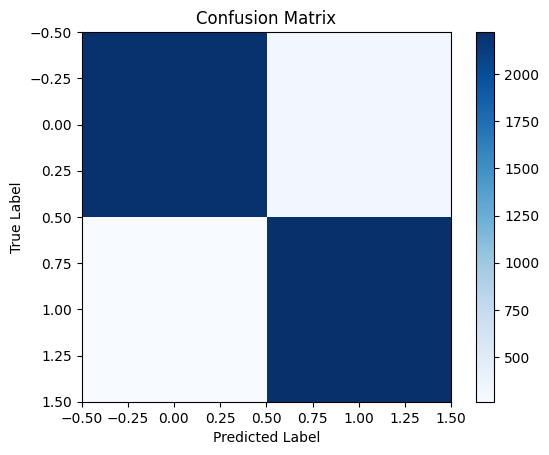

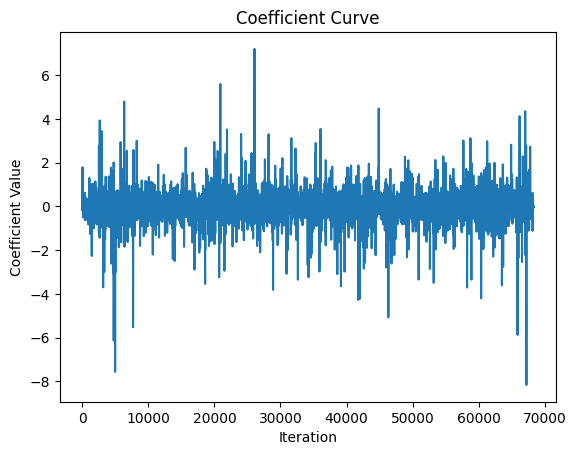

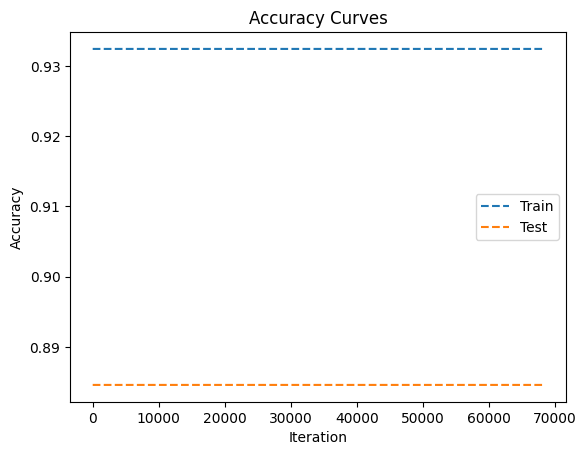

train_accuracy: 0.9324
test_accuracy: 0.8846


In [38]:
from datasets import load_dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import random

# Load the IMDB dataset from Hugging Face's datasets library
dataset = load_dataset("imdb")

# Get the total number of examples in the dataset
total_examples = len(dataset["train"]["text"])

# Randomly pick 5 indices
random_indices = random.sample(range(total_examples), 5)

# Extract random reviews and labels
random_reviews = [dataset["train"]["text"][i] for i in random_indices]
random_labels = [dataset["train"]["label"][i] for i in random_indices]

# Display the randomly picked samples
print(f"Sample Dataset:")
for review, label in zip(random_reviews, random_labels):
    print(f"Label: {label}")
    print(f"Review: {review}")
    print("=" * 50)
print()

# Extract text and labels
texts = dataset["train"]["text"]
labels = dataset["train"]["label"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Convert text data to feature vectors using TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

# Build and train a logistic regression classifier with increased max_iter
classifier = LogisticRegression(max_iter=1000)  # Increase max_iter
classifier.fit(X_train_vectors, y_train)

# Make predictions on the test set
predictions = classifier.predict(X_test_vectors)

# Display a few samples with predictions and actual labels
print(f"Some Predictions:")
for i in range(5):
    print(f"Text: {X_test[i]}")
    print(f"Prediction: {predictions[i]}, Actual: {y_test[i]}")
    print()

# Plot confusion matrix
cm = confusion_matrix(y_test, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plot loss curve
plt.plot(range(len(classifier.coef_[0])), classifier.coef_[0])
plt.title("Coefficient Curve")
plt.xlabel("Iteration")
plt.ylabel("Coefficient Value")
plt.show()

# Calculate and plot accuracy
train_predictions = classifier.predict(X_train_vectors)
test_predictions = classifier.predict(X_test_vectors)

train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# Plot accuracy curves
plt.plot(range(len(classifier.coef_[0])), [train_accuracy] * len(classifier.coef_[0]), label='Train', linestyle='--')
plt.plot(range(len(classifier.coef_[0])), [test_accuracy] * len(classifier.coef_[0]), label='Test', linestyle='--')
plt.title("Accuracy Curves")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Print accuracy values
print(f'train_accuracy: {train_accuracy}')
print(f'test_accuracy: {test_accuracy}')